# Farina in Natura - estratégia

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime
import fpdf as FPDF


In [3]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# para resolver o problema: "(unicode error) 'utf-8' codec can't decode "
# https://www.youtube.com/watch?v=ZSC7X4N8RKo,
#Erro: 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 900: invalid continuation byte
# enem = pd.read_csv("MICRODADOS_ENEM_2020.csv", encoding="utf-8", sep = ';')
# enem = pd.read_csv("MICRODADOS_ENEM_2020.csv", encoding="ISO-8859-1", sep = ';')

transactions = pd.read_csv(r'C:\Users\ctobr\OneDrive\DATA_Science\1_farina_in_natura\farina_in_natura00\CSV\farina.CSV', 
encoding="ISO-8859-1", sep = ';')

In [5]:
transactions.head()

venda         data_hora     cliente mesa   item                produto  \
0  460.0  01/02/2022 08:13  CONSUMIDOR  M 1  119.0  SUCO DE LARANJA 400ML   
1  460.0  01/02/2022 08:13  CONSUMIDOR  M 1  121.0     PAO SOURDOUGH OVOS   
2  461.0  01/02/2022 08:14  CONSUMIDOR  M 2  119.0  SUCO DE LARANJA 400ML   
3  461.0  01/02/2022 08:14  CONSUMIDOR  M 2  121.0     PAO SOURDOUGH OVOS   
4  465.0  01/02/2022 09:01  CONSUMIDOR  M 1   46.0       QUICHE BACON 90G   

   quantidade valor_unit  desconto total_item  
0         1.0       14,5       0.0       14,5  
1         1.0       15,5       0.0       15,5  
2         1.0       14,5       0.0       14,5  
3         1.0       15,5       0.0       15,5  
4         2.0       19,5       0.0         39

In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25998 entries, 0 to 25997
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   venda       25992 non-null  float64
 1   data_hora   25992 non-null  object 
 2   cliente     25992 non-null  object 
 3   mesa        22779 non-null  object 
 4   item        25922 non-null  float64
 5   produto     25992 non-null  object 
 6   quantidade  25992 non-null  float64
 7   valor_unit  25992 non-null  object 
 8   desconto    25992 non-null  float64
 9   total_item  25992 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.0+ MB


# Limpeza e manipulação dos dados

In [7]:
### CHECK OUT IF THE NUMBER OF TOTAL ENTRIES IS EQUAL TO THE NUMBER OF ENTRIES OF THE VARIABLES  

transactions.isnull().sum()

venda            6
data_hora        6
cliente          6
mesa          3219
item            76
produto          6
quantidade       6
valor_unit       6
desconto         6
total_item       6
dtype: int64

In [8]:
## DROPPING THE ROWS THAT ALL COLUMN VALUES ARE NULL
#  https://www.youtube.com/watch?v=uDr67HBIPz8&t=818s

transactions = transactions.dropna(how='all')

In [9]:
# Delete the column "item"

del transactions["item"]

In [10]:
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25992 entries, 0 to 25997
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   venda       25992 non-null  float64
 1   data_hora   25992 non-null  object 
 2   cliente     25992 non-null  object 
 3   mesa        22779 non-null  object 
 4   produto     25992 non-null  object 
 5   quantidade  25992 non-null  float64
 6   valor_unit  25992 non-null  object 
 7   desconto    25992 non-null  float64
 8   total_item  25992 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.0+ MB


venda         data_hora     cliente mesa                produto  \
0  460.0  01/02/2022 08:13  CONSUMIDOR  M 1  SUCO DE LARANJA 400ML   
1  460.0  01/02/2022 08:13  CONSUMIDOR  M 1     PAO SOURDOUGH OVOS   
2  461.0  01/02/2022 08:14  CONSUMIDOR  M 2  SUCO DE LARANJA 400ML   
3  461.0  01/02/2022 08:14  CONSUMIDOR  M 2     PAO SOURDOUGH OVOS   
4  465.0  01/02/2022 09:01  CONSUMIDOR  M 1       QUICHE BACON 90G   

   quantidade valor_unit  desconto total_item  
0         1.0       14,5       0.0       14,5  
1         1.0       15,5       0.0       15,5  
2         1.0       14,5       0.0       14,5  
3         1.0       15,5       0.0       15,5  
4         2.0       19,5       0.0         39

In [11]:
## Using isna() to select all rows with NaN in the column ('mesa') and the value "CONSUMIDOR" on the column "cliente" 
## and replace the "mesa" value with "M0"
## https://datatofish.com/rows-with-nan-pandas-dataframe/
## https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

transactions.loc[(transactions["cliente"] == 'CONSUMIDOR') &  (transactions['mesa'].isna()), 'mesa']= 'M0'


In [12]:
# Checking if the changes were correct.

transactions.loc[transactions["mesa"] == 'M0']

venda         data_hora     cliente mesa                      produto  \
121  520.0  02/02/2022 16:57  CONSUMIDOR   M0        BOMBOLONI NUTELLA 80G   
122  520.0  02/02/2022 16:57  CONSUMIDOR   M0    TARTELETE DE MORANGO 120G   
123  520.0  02/02/2022 16:57  CONSUMIDOR   M0      CROISSANT MUSSATRELA DE   
894  856.0  11/02/2022 19:19  CONSUMIDOR   M0  CROISSANT BRIE PARMA MEL DE   
895  856.0  11/02/2022 19:19  CONSUMIDOR   M0    VH SANTA HORTENSIA SAUVIG   

     quantidade valor_unit  desconto total_item  
121         2.0         12       0.0         24  
122         1.0         18       0.0         18  
123         1.0       25,5       0.0       25,5  
894         2.0       25,5       0.0         51  
895         1.0         59       0.0         59

In [13]:
# Assigning a value "ND" to the empty records in column "mesa"
# https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp

transactions['mesa'].fillna("ND",inplace = True )

In [ ]:
# Find Unique Values in the Column "produto"
# https://www.statology.org/pandas-unique-values-in-column/
transactions.produto.value_counts()

In [15]:
## Get unique names in the "produto" column using Series.unique() 
## https://sparkbyexamples.com/pandas/pandas-count-unique-values-in-column/
transactions.produto.unique().size

212

In [16]:
# Convert the "venda" variable from float64 type to integer type
# https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas

transactions['venda'] = np.int64(transactions['venda'])

In [17]:
# Convert "data" to datetime object
transactions['data_hora'] = pd.to_datetime(transactions['data_hora'], format='%d/%m/%Y %H:%M')

#How to Solve Python ValueError: unconverted data remains
#read://https_researchdatapod.com/?url=https%3A%2F%2Fresearchdatapod.com%2Fhow-to-solve-python-valueerror-unconverted-data-remains%2F

In [18]:
# Convert the "quantidade" variable from float64 type to integer type
# https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas

transactions['quantidade'] = np.int64(transactions['quantidade'])

In [19]:
# change the decimal delimiter of the the variable "valor_unit" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['valor_unit'] = transactions['valor_unit'].str.replace(",",".")

# Convert the "valor_uni" variable from object type to float64 type
# https://www.statology.org/pandas-convert-object-to-float/

transactions['valor_unit'] = transactions['valor_unit'].astype(float)

In [20]:
# change the decimal delimiter of the the variable "total_item" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['total_item'] = transactions['total_item'].str.replace(",",".")

# Convert the "total_item" variable from object type to float64 type
# https://www.statology.org/pandas-convert-object-to-float/

transactions['total_item'] = transactions['total_item'].astype(float)

In [21]:
# Verificando se o valor "total_item" é igual a: "quantidade" * "valor_unit"

transactions["total_item_verif"] = transactions['quantidade']* transactions['valor_unit']

In [34]:
# Continuando o item anterior
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

transactions['confirm'] = np.where(transactions['total_item'] > transactions['total_item_verif'], True, False)


In [35]:
# continuando o item anterior
transactions.loc[transactions["confirm"] == True].sum()

C:\Users\ctobr\AppData\Local\Temp\ipykernel_25544\3180257399.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  transactions.loc[transactions["confirm"] == True].sum()


venda                                                        13730391
cliente             CONSUMIDORCONSUMIDORCONSUMIDORCONSUMIDORIFOODC...
mesa                M 5M 13M 11M 5NDM 19NDM 13M 13M 17NDM 23M 23M ...
produto             CROISSANTCROISSANTCROISSANTCROISSANTCROISSANT ...
quantidade                                                       2139
valor_unit                                                    21083.7
desconto                                                          0.0
total_item                                                    53878.3
total_item_verif                                              22219.1
confirm                                                          2032
dtype: object

In [38]:
# How do I select specific rows and columns from a DataFrame?
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-select-specific-rows-and-columns-from-a-dataframe
# https://www.geeksforgeeks.org/select-rows-columns-by-name-or-index-in-pandas-dataframe-using-loc-iloc/

ts2 = transactions.loc[transactions["confirm"] == True, ["venda", "produto", "quantidade", "valor_unit", "total_item", "total_item_verif"]]

In [39]:
ts2

venda                      produto  quantidade  valor_unit  total_item  \
7039    3571                    CROISSANT           1        10.0        25.5   
7047    3575                    CROISSANT           1        10.0        28.9   
7054    3582                    CROISSANT           1        10.0        25.5   
7072    3599                    CROISSANT           1        10.0        19.5   
7074    3600              CROISSANT IFOOD           1        12.0        51.0   
7086    3603                    CROISSANT           1        10.0        19.5   
7088    3606              CROISSANT IFOOD           1        12.0        29.5   
7110    3616                    CROISSANT           1        10.0        25.5   
7111    3616                    CROISSANT           1        10.0        28.9   
7112    3619                    CROISSANT           1        10.0        25.5   
7116    3622              CROISSANT IFOOD           1        12.0        29.5   
7125    3631                    CROISSANT           1        10.0        25.5   
7126    3631                    CROISSANT           1        10.0        28.9   
7129    3628                    CROISSANT           1        10.0        25.5   
7135    3625                    CROISSANT           1        10.0        25.5   
7138    3626                    CROISSANT           1        10.0        25.5   
7141    3627                    CROISSANT           1        10.0        25.5   
7142    3627                    CROISSANT           1        10.0        28.9   
7151    3638                    CROISSANT           1        10.0        25.5   
7154    3639                    CROISSANT           1        10.0        25.5   
7160    3645                    CROISSANT           1        10.0        16.5   
7161    3645                    CROISSANT           1        10.0        25.5   
7172    3656                    CROISSANT           1        10.0        25.5   
7175    3652                    CROISSANT           1        10.0        19.5   
7178    3655                    CROISSANT           1        10.0        16.5   
7189    3663              CROISSANT IFOOD           1        12.0        22.5   
7190    3663              CROISSANT IFOOD           2        12.0        59.0   
7193    3664              CROISSANT IFOOD           1        12.0        22.5   
7199    3666              CROISSANT IFOOD           1        12.0        29.5   
7200    3666              CROISSANT IFOOD           1        12.0        33.5   
7210    3657                    CROISSANT           1        10.0        25.5   
7217    3670                    CROISSANT           1        10.0        25.5   
7222    3671                    CROISSANT           2        10.0        51.0   
7223    3673                    CROISSANT           1        10.0        28.9   
7246    3684                    CROISSANT           1        10.0        25.5   
7249    3688              CROISSANT IFOOD           1        12.0        29.5   
7253    3689                    CROISSANT           1        10.0        25.5   
7256    3690                    CROISSANT           1        10.0        25.5   
7258    3692                    CROISSANT           1        10.0        25.5   
7269    3696                    CROISSANT           2        10.0        51.0   
7291    3709                    CROISSANT           1        10.0        19.5   
7307    3721                    CROISSANT           1        10.0        25.5   
7310    3726                    CROISSANT           1        10.0        25.5   
7314    3729                    CROISSANT           1        10.0        25.5   
7331    3740                    CROISSANT           1        10.0        25.5   
7334    3739                    CROISSANT           1        10.0        25.5   
7354    3754                    CROISSANT           1        10.0        19.5   
7358    3757                    CROISSANT           1        10.0        25.5   
7370    3761                    CROISS

In [40]:
# Exporting to a pdf file the transactions that has a inconsistent data.
from matplotlib.backends.backend_pdf import PdfPages


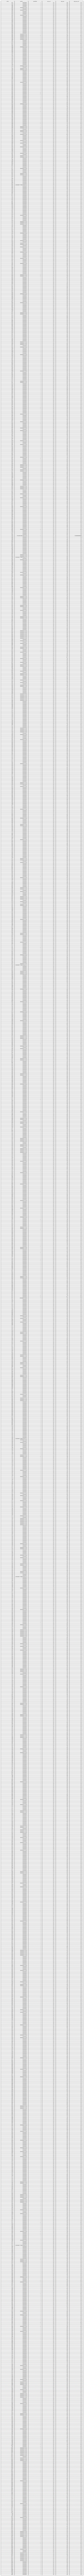

In [41]:
# https://www.alixaprodev.com/2022/05/convert-pandas-dataframe-to-pdf-in-python.html
fig, ax =plt.subplots(figsize=(14,6))
ax.axis('equal')
ax.axis('off')
the_table = ax.table(cellText=ts2.values,colLabels=ts2.columns,loc='center')




In [ ]:
pp = PdfPages("foo3.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()